데이터 전처리

<ipython-input-1-1dc5b23e3a78>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "date_time": pd.date_range(start="2024-01-01", periods=num_samples, freq="H"),


데이터프레임의 일부 샘플:
            date_time  taxi_count  request_count  average_wait_time  hour  \
0 2024-01-01 00:00:00          43            428          24.585568     0   
1 2024-01-01 01:00:00          33            127          20.306450     1   
2 2024-01-01 02:00:00          19            459          17.109961     2   
3 2024-01-01 03:00:00          47            111          21.520503     3   
4 2024-01-01 04:00:00          12            181          18.825036     4   

   day_of_week  
0            0  
1            0  
2            0  
3            0  
4            0  

데이터 통계 요약:
                           date_time   taxi_count  request_count  \
count                           1000  1000.000000    1000.000000   
mean   2024-01-21 19:29:59.999999744    27.000000     274.625000   
min              2024-01-01 00:00:00     5.000000      50.000000   
25%              2024-01-11 09:45:00    16.000000     160.750000   
50%              2024-01-21 19:30:00    28.000000     274.500000   


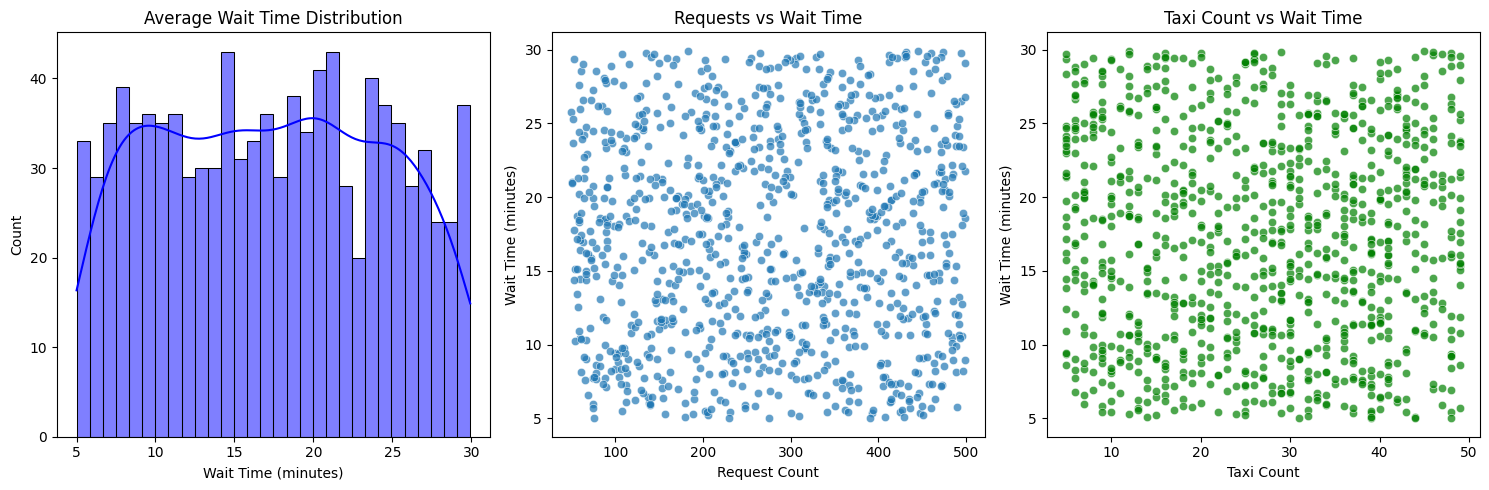

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 가상 데이터 생성: 콜택시 대기 시간과 관련된 데이터프레임
np.random.seed(42)  # 재현 가능성을 위한 시드 설정

# 데이터 크기
num_samples = 1000

# 데이터 생성
data = {
    "date_time": pd.date_range(start="2024-01-01", periods=num_samples, freq="H"),
    "taxi_count": np.random.randint(5, 50, size=num_samples),  # 콜택시 대수
    "request_count": np.random.randint(50, 500, size=num_samples),  # 시간대별 요청 수
    "average_wait_time": np.random.uniform(5, 30, size=num_samples)  # 평균 대기 시간 (분 단위)
}

df = pd.DataFrame(data)

# 시간대 추가 (파생 변수)
df["hour"] = df["date_time"].dt.hour
df["day_of_week"] = df["date_time"].dt.dayofweek

# 데이터 확인
print("데이터프레임의 일부 샘플:")
print(df.head())

# 데이터 통계 요약
print("\n데이터 통계 요약:")
print(df.describe())

# 시각화
plt.figure(figsize=(15, 5))

# 대기 시간 히스토그램
plt.subplot(1, 3, 1)
sns.histplot(df["average_wait_time"], kde=True, bins=30, color="blue")
plt.title("Average Wait Time Distribution")
plt.xlabel("Wait Time (minutes)")

# 요청 수 vs 대기 시간
plt.subplot(1, 3, 2)
sns.scatterplot(x="request_count", y="average_wait_time", data=df, alpha=0.7)
plt.title("Requests vs Wait Time")
plt.xlabel("Request Count")
plt.ylabel("Wait Time (minutes)")

# 택시 대수 vs 대기 시간
plt.subplot(1, 3, 3)
sns.scatterplot(x="taxi_count", y="average_wait_time", data=df, alpha=0.7, color="green")
plt.title("Taxi Count vs Wait Time")
plt.xlabel("Taxi Count")
plt.ylabel("Wait Time (minutes)")

plt.tight_layout()
plt.show()


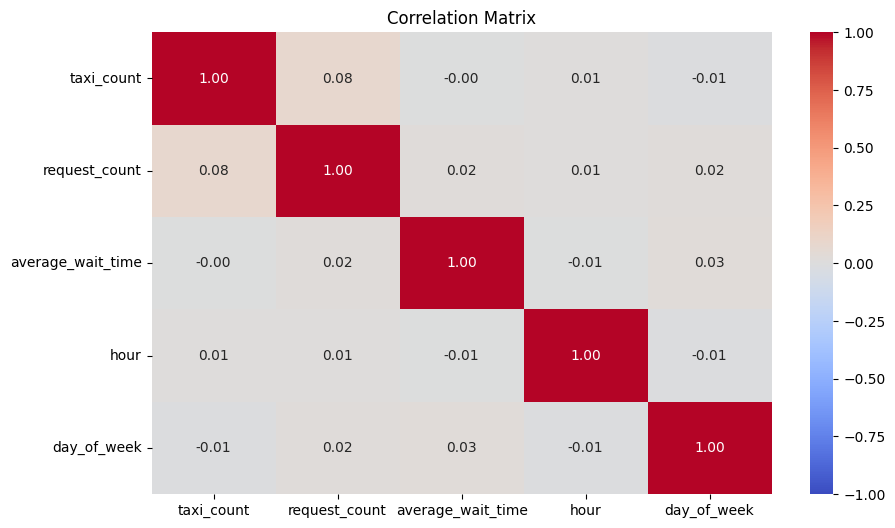

택시 대수와 평균 대기 시간 간 상관계수: -0.00
요청 수와 평균 대기 시간 간 상관계수: 0.02


In [2]:
# 상관관계 분석
correlation_matrix = df[["taxi_count", "request_count", "average_wait_time", "hour", "day_of_week"]].corr()

# 상관관계 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 특정 변수 간 상관계수
correlation_taxi_wait = correlation_matrix.loc["taxi_count", "average_wait_time"]
correlation_request_wait = correlation_matrix.loc["request_count", "average_wait_time"]

print(f"택시 대수와 평균 대기 시간 간 상관계수: {correlation_taxi_wait:.2f}")
print(f"요청 수와 평균 대기 시간 간 상관계수: {correlation_request_wait:.2f}")


시계열 분석

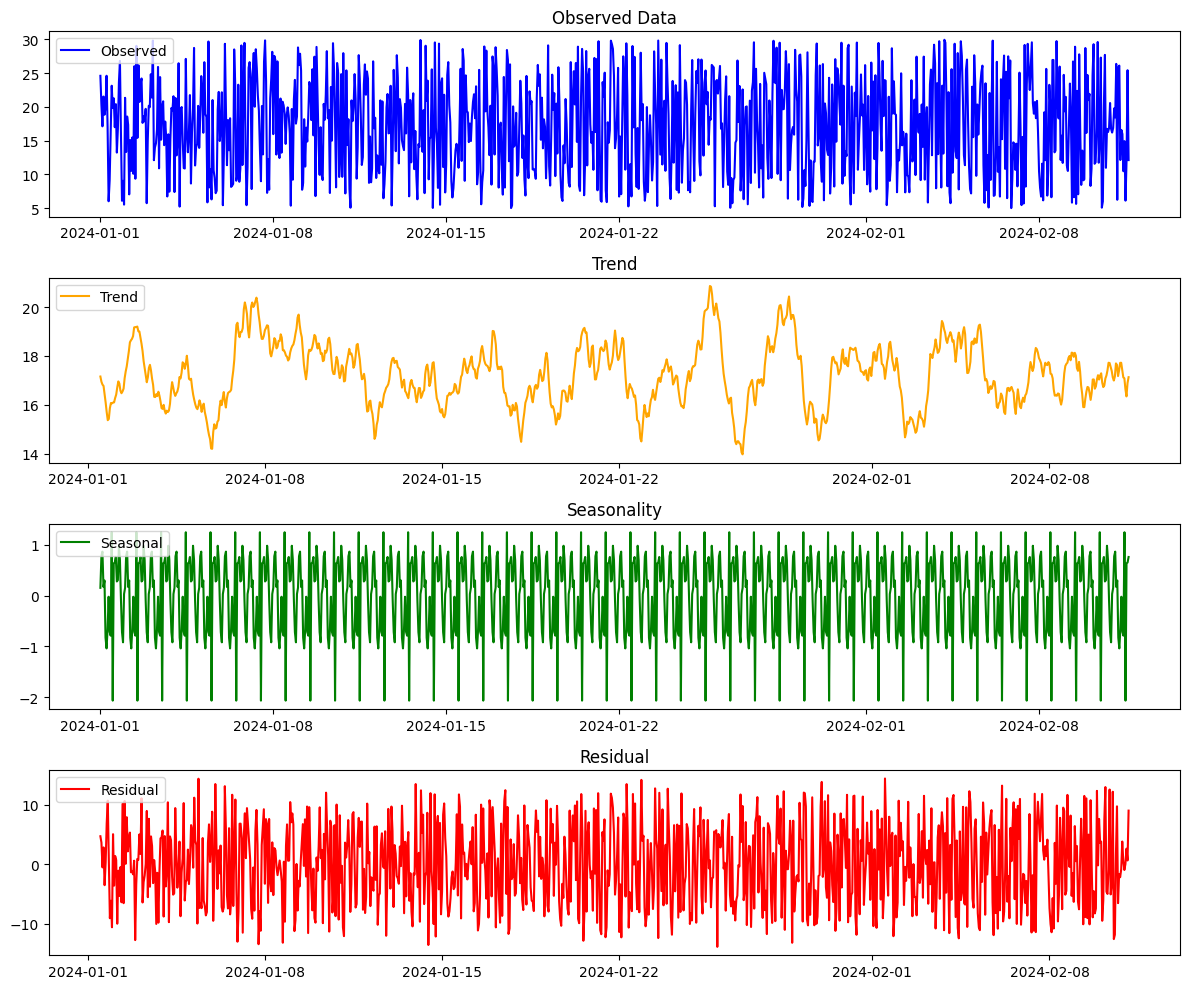

트렌드 데이터 샘플:
date_time
2024-01-01 12:00:00    17.159351
2024-01-01 13:00:00    16.945756
2024-01-01 14:00:00    16.830202
2024-01-01 15:00:00    16.773190
2024-01-01 16:00:00    16.440368
Name: trend, dtype: float64

하루 주기의 계절성 데이터:
date_time
2024-01-01 00:00:00    0.152970
2024-01-01 01:00:00    0.775527
2024-01-01 02:00:00    0.865663
2024-01-01 03:00:00    0.170335
2024-01-01 04:00:00    0.297742
2024-01-01 05:00:00   -0.827275
2024-01-01 06:00:00   -1.039551
2024-01-01 07:00:00   -0.663004
2024-01-01 08:00:00   -0.022229
2024-01-01 09:00:00   -0.714689
2024-01-01 10:00:00   -0.788517
2024-01-01 11:00:00    1.247485
2024-01-01 12:00:00   -2.067531
2024-01-01 13:00:00    0.635444
2024-01-01 14:00:00    0.650667
2024-01-01 15:00:00    0.760129
2024-01-01 16:00:00    0.278363
2024-01-01 17:00:00    0.303593
2024-01-01 18:00:00    0.981552
2024-01-01 19:00:00    0.699176
2024-01-01 20:00:00   -0.089531
2024-01-01 21:00:00   -0.718356
2024-01-01 22:00:00   -0.919555
2024-01-01 23:00:00   

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 시계열 데이터 준비
time_series_data = df.set_index("date_time")["average_wait_time"]

# 시계열 분해: Additive 모델 사용, 하루(24시간) 주기를 기준으로 분해
decomposition = seasonal_decompose(time_series_data, model="additive", period=24)

# 시계열 분해 결과 시각화
plt.figure(figsize=(12, 10))

# 관측값 (Observed)
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label="Observed", color="blue")
plt.legend(loc="upper left")
plt.title("Observed Data")

# 트렌드 (Trend)
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="orange")
plt.legend(loc="upper left")
plt.title("Trend")

# 계절성 (Seasonality)
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonal", color="green")
plt.legend(loc="upper left")
plt.title("Seasonality")

# 잔차 (Residual)
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual", color="red")
plt.legend(loc="upper left")
plt.title("Residual")

plt.tight_layout()
plt.show()

# 트렌드와 계절성 데이터 확인
trend = decomposition.trend.dropna()
seasonality = decomposition.seasonal.head(24)  # 하루 주기의 계절성 데이터

print("트렌드 데이터 샘플:")
print(trend.head())

print("\n하루 주기의 계절성 데이터:")
print(seasonality)


선형 회귀 모델 평가:
평균 제곱 오차 (MSE): 51.32
결정 계수 (R^2): 0.00

회귀 계수:
         Feature  Coefficient
3    day_of_week     0.063765
2           hour     0.002072
1  request_count     0.000671
0     taxi_count    -0.000198


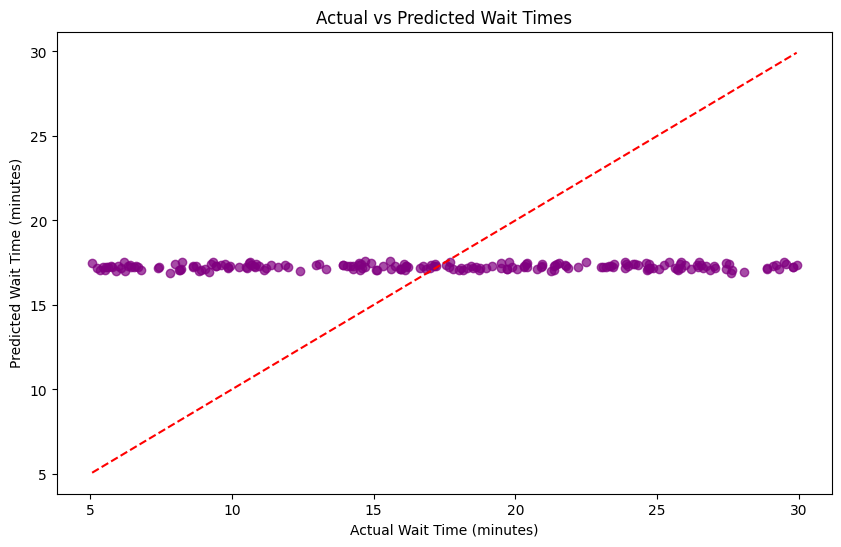

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 분리
X = df[["taxi_count", "request_count", "hour", "day_of_week"]]  # 독립 변수
y = df["average_wait_time"]  # 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측
y_pred = lr_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 회귀 계수 출력
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("선형 회귀 모델 평가:")
print(f"평균 제곱 오차 (MSE): {mse:.2f}")
print(f"결정 계수 (R^2): {r2:.2f}\n")

print("회귀 계수:")
print(coefficients)

# 실제 vs 예측 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Actual vs Predicted Wait Times")
plt.xlabel("Actual Wait Time (minutes)")
plt.ylabel("Predicted Wait Time (minutes)")
plt.show()
